In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from keras.utils import to_categorical
from keras.utils  import  load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import confusion_matrix,classification_report
from keras.optimizers import Adam
os.listdir('/content/drive/MyDrive/dataset')

['test',
 'train',
 'variables',
 'assets',
 'new.jpg',
 'keras_metadata.pb',
 'fingerprint.pb',
 'saved_model.pb']

In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/dataset/train"
TEST_PATH = "/content/drive/MyDrive/dataset/test"
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
IMG_SHAPE= (224,224)

train_datagen = ImageDataGenerator(rescale=1/255.0,
                                 zoom_range=0.2,
                                 shear_range=0.3,
                                 horizontal_flip=True,
                                 brightness_range=[0.5,1.5])

test_datagen = ImageDataGenerator(rescale=1/255.0)


train_gen = train_datagen.flow_from_directory(TRAIN_PATH,
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="binary")

test_gen = test_datagen.flow_from_directory(TEST_PATH,
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="binary")

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


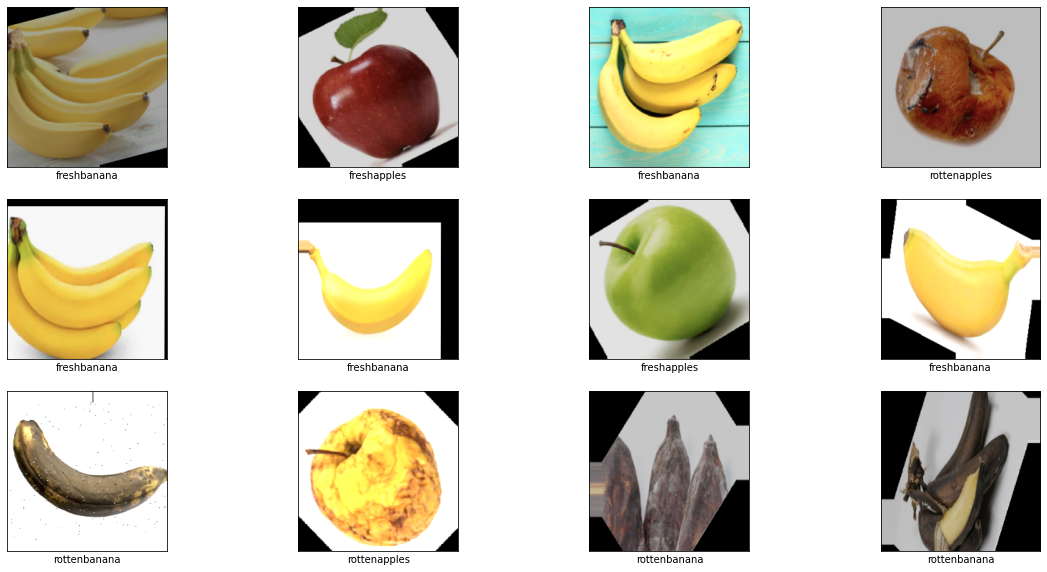

In [ ]:
#get classes dict
classes_dict = dict(test_gen.class_indices)
#reverse
classes_dict = {v: k for k,v in classes_dict.items()}
#let's plot sone images
images,labels=train_gen.next()
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes_dict[labels[i]])

In [ ]:

inception = InceptionV3(weights='imagenet',input_shape=(224, 224, 3),include_top=False)

inception.summary()

layers = inception.layers
print(f'Number of Layers: {len(layers)}')

87910968/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:

TRAIN_SIZE = train_gen.samples
TEST_SIZE = test_gen.samples

callbacks = EarlyStopping(patience = 3, monitor='val_acc')


inputs = inception.input

x = inception.output
x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

outputs = Dense(6, activation ='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


for layer in layers:
    layer.trainable = False

model.compile(optimizer=Adam(LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
                train_gen,
                epochs= EPOCHS,
                validation_data = test_gen,
                validation_steps = TEST_SIZE//BATCH_SIZE,
                steps_per_epoch = TRAIN_SIZE//BATCH_SIZE,
                callbacks = [callbacks])

Epoch 1/10
340/340 [==============================] - ETA: 0s - loss: 0.2814 - accuracy: 0.9013 

340/340 [==============================] - 6556s 19s/step - loss: 0.2814 - accuracy: 0.9013 - val_loss: 0.1072 - val_accuracy: 0.9576
Epoch 2/10
340/340 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.9461

340/340 [==============================] - 228s 670ms/step - loss: 0.1511 - accuracy: 0.9461 - val_loss: 0.0578 - val_accuracy: 0.9788
Epoch 3/10
340/340 [==============================] - ETA: 0s - loss: 0.1169 - accuracy: 0.9565

340/340 [==============================] - 223s 655ms/step - loss: 0.1169 - accuracy: 0.9565 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 4/10
340/340 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9631

340/340 [==============================] - 224s 657ms/step - loss: 0.1014 - accuracy: 0.9631 - val_loss: 0.0535 - val_accuracy: 0.9814
Epoch 5/10
340/340 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.9665

340/340 [==============================] - 224s 658ms/step - loss: 0.0937 - accuracy: 0.9665 - val_loss: 0.0572 - val_accuracy: 0.9792
Epoch 6/10
340/340 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9674

340/340 [==============================] - 220s 648ms/step - loss: 0.0922 - accuracy: 0.9674 - val_loss: 0.0432 - val_accuracy: 0.9855
Epoch 7/10
340/340 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.9716

340/340 [==============================] - 221s 651ms/step - loss: 0.0848 - accuracy: 0.9716 - val_loss: 0.0393 - val_accuracy: 0.9859
Epoch 8/10
340/340 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9689

340/340 [==============================] - 220s 647ms/step - loss: 0.0871 - accuracy: 0.9689 - val_loss: 0.0406 - val_accuracy: 0.9851
Epoch 9/10
340/340 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9727

340/340 [==============================] - 222s 654ms/step - loss: 0.0757 - accuracy: 0.9727 - val_loss: 0.0436 - val_accuracy: 0.9851
Epoch 10/10
340/340 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9727

340/340 [==============================] - 221s 649ms/step - loss: 0.0802 - accuracy: 0.9727 - val_loss: 0.0411 - val_accuracy: 0.9859


In [ ]:

import os

import tensorflow as tf
from tensorflow import keras
model.save('fruits_datas.h5')

NameError: ignored

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/fruits_datas.h5')

In [ ]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/fruits_datas.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
model.evaluate_tflite('model.tflite', val_data)

AttributeError: ignored

In [ ]:

from tensorflow import keras
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img,img_to_array
img_height, img_width = 224, 224
img_path = '/content/drive/MyDrive/fruts/dataset/dataset/test/rottenapples/Screen Shot 2018-06-07 at 2.15.34 PM.png'
img =load_img(img_path, target_size=(img_height, img_width))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0
preds = model.predict(x)
print(preds)
if preds[0][0] > 0.5:
    print("The fruit is a fresh  apple .")
elif preds[0][1] > 0.5:
  print("The fruit is a fresh banana .")
elif preds[0][2] > 0.5:
  print("The fruit is a fresh  orange .")
elif preds[0][3] > 0.5:
  print("The fruit is  a rotten apple.")
elif preds[0][4] > 0.5:
  print("The fruit is a rotten banana.")
else:
    print("The fruit is a rotten orange.")

1/1 [==============================] - 9s 9s/step
[[1.5136133e-09 2.8386907e-13 1.1428081e-12 9.9999928e-01 1.5199192e-10
  6.6107754e-07]]
The fruit is  a rotten apple.


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load the pre-trained ML model
model = tf.keras.models.load_model('/content/drive/MyDrive/fruits_datas.h5')

# Start capturing video from webcam
cap = cv2.VideoCapture(1)

# Set the frame size
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)


while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    # Display the original frame
    cv2.imshow('Fruit Detector', frame)

    # Wait for key press
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord(' '):
        # Capture the image and save it to a file
        fruit = frame
        cv2.imwrite('fruit.jpg', fruit)

        # Preprocess the image for the ML model
        img = tf.keras.preprocessing.image.img_to_array(fruit)
        img = tf.keras.preprocessing.image.smart_resize(img, (224, 224))
        img = tf.keras.applications.mobilenet_v2.preprocess_input(img)

        # Pass the image to the ML model and get the prediction
        preds = model.predict(np.expand_dims(img, axis=0))
        print(preds)

        # Define a dictionary to map indices to fruit labels
        label_dict = {0: "fresh apple", 1: "fresh banana", 2: "fresh orange",
                      3: "rotten apple", 4: "rotten banana", 5: "rotten orange"}

        # Get the index of the maximum value in the preds array
        pred_index = np.argmax(preds)
        print(pred_index)
        # Check if the predicted class is above the threshold
        if preds[0][pred_index] > 0.5:
            # Get the corresponding fruit label from the   dictionary
            label = label_dict[pred_index]
            print(f"The fruit is a {label}.")
        else:
            print("Please show a valid image.")

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


AttributeError: ignored

Text(0.5, 0, 'N.of Epochs')

<Figure size 432x288 with 0 Axes>

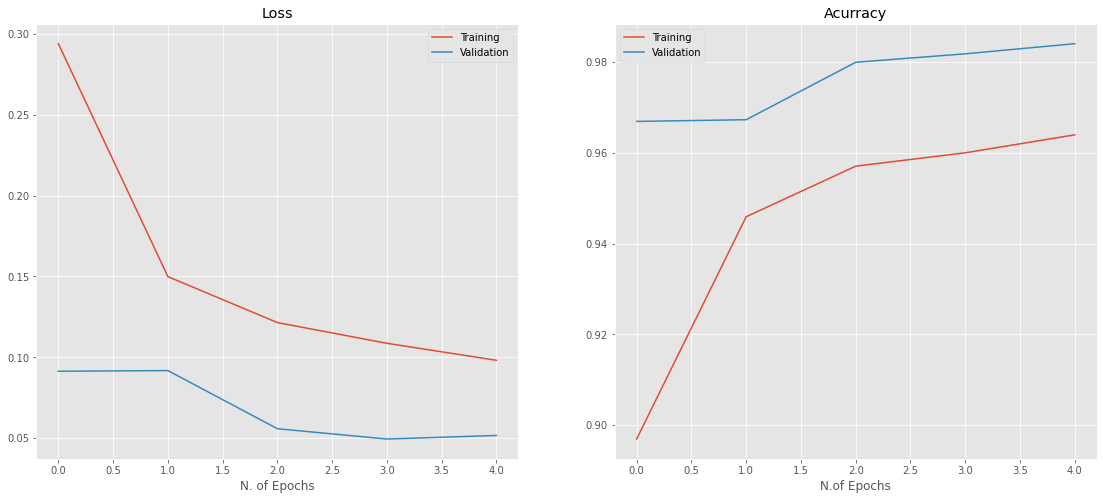

In [ ]:
plt.style.use('ggplot')
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,8))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training','Validation'])
ax1.set_title('Loss')
ax1.set_xlabel('N. of Epochs')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['Training','Validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('N.of Epochs')

In [ ]:

loss, test_acc = model.evaluate(test_gen)
print("Validation Accuracy = %f \nValidation Loss = %f " % (test_acc, loss))


85/85 [==============================] - 553s 6s/step - loss: 0.0409 - accuracy: 0.9859
Validation Accuracy = 0.985915 
Validation Loss = 0.040929 


85/85 [==============================] - 20s 224ms/step


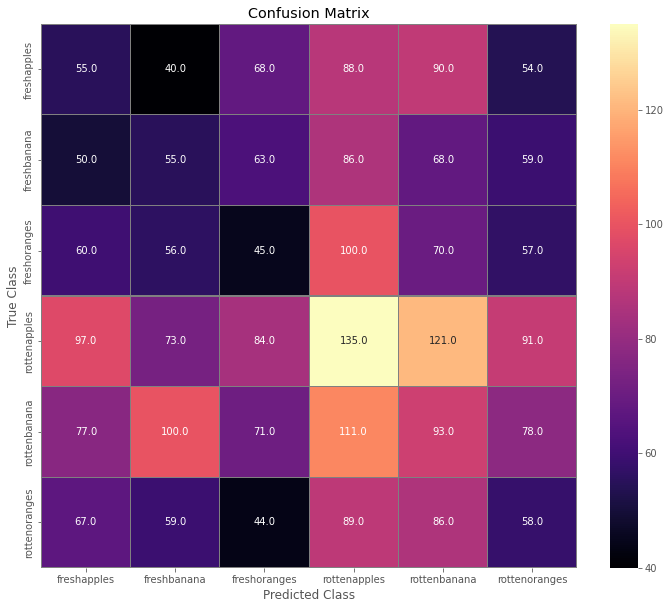

In [ ]:
class_names = list(classes_dict.values())
labels = test_gen.classes
preds =  model.predict(test_gen)
predictions = np.argmax(preds, axis=1)
conf_matrix = confusion_matrix(labels, predictions)
fig,ax = plt.subplots(figsize=(12, 10))
sb.heatmap(conf_matrix, annot=True, linewidths=0.01,cmap="magma",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
ax.set_xticklabels(labels = class_names,fontdict=None)
ax.set_yticklabels(labels = class_names,fontdict=None)
plt.show()

1/1 [==============================] - 0s 49ms/step


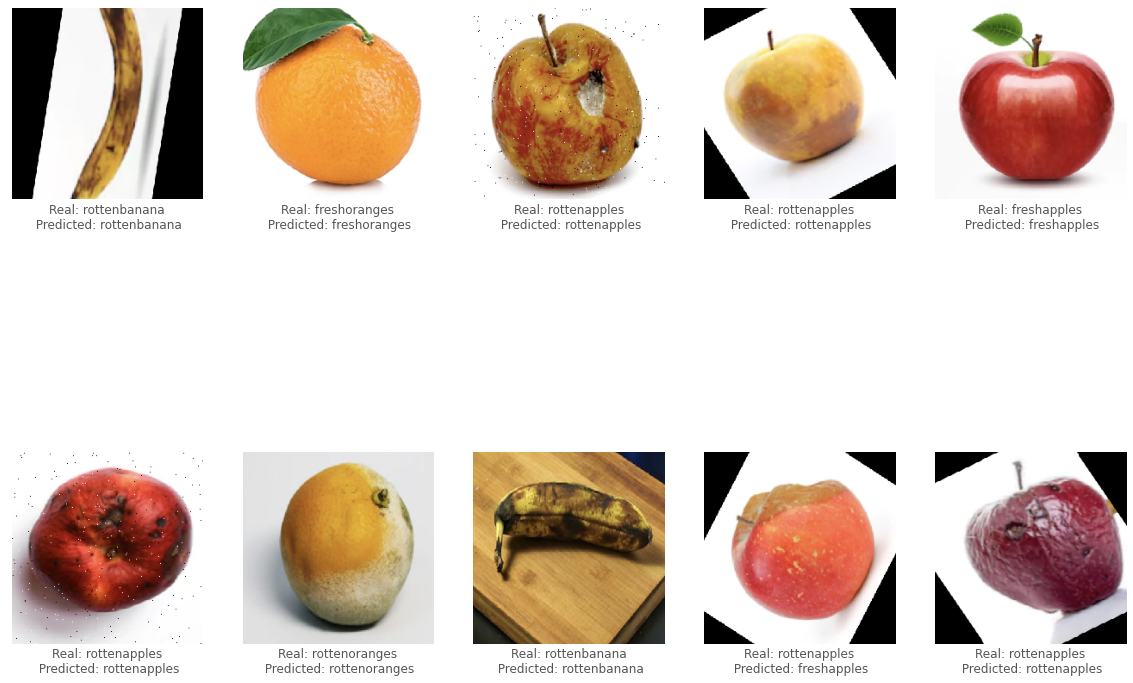

In [ ]:
test_images,test_labels=test_gen.next()
plt.figure(figsize=(20,15))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
    real = classes_dict[test_labels[i]]
    img = test_images[i].reshape(1,224,224,3)
    predicted = int(np.argmax(model.predict(img),axis=1))
    predicted = classes_dict[predicted]
    plt.xlabel(f"Real: {real}\n Predicted: {predicted}")